# Clustering

### Load libraries

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

### Import data

In [2]:
pre_path = 'data/'
suffix = '_w_lix_sentiment.csv'

subreddits = list(glob.glob('data/*'))
subreddits = list(set([sub.split('\\')[1].split('_')[0] for sub in subreddits]))
items_to_remove = ['combined', 'cleaned', 'word2vec.model', 'sentiment']
subreddits = [sub for sub in subreddits if sub not in items_to_remove]
print(subreddits)

n_subs =  len(subreddits)

['politics', 'worldnews', 'Palestine', 'Israel', 'baking']


### Load the dataframes

In [3]:
dfs = {}
for sub in subreddits:
    dfs[sub] = pd.read_csv(pre_path + sub + suffix, index_col = 'comment_id')

attribute_cols = ['sentiment_score', 'log_lix_score','log_upvotes']

### Evaluate GMM, Hierarchical and K-means for both standardized and normalized data

In [4]:
gmm_sil_s = {}
gmm_sil_n = {}
hierarchical_sil_s = {}
hierarchical_sil_n = {}
kmeans_sil_s = {}
kmeans_sil_n = {}

gmm_cal_s = {}
gmm_cal_n = {}
hierarchical_cal_s = {}
hierarchical_cal_n = {}
kmeans_cal_s = {}
kmeans_cal_n = {}

n_clusters_range = range(2, 20)

seed = 42


for sub, df in dfs.items():
    df = df[attribute_cols]

    gmm_sil_s[sub] = []
    gmm_sil_n[sub] = []
    gmm_cal_s[sub] = []
    gmm_cal_n[sub] = []

    hierarchical_sil_s[sub] = []
    hierarchical_sil_n[sub] = []
    hierarchical_cal_s[sub] = []
    hierarchical_cal_n[sub] = []

    kmeans_cal_s[sub] = []
    kmeans_cal_n[sub] = []
    kmeans_sil_s[sub] = []
    kmeans_sil_n[sub] = []

    points_s = StandardScaler().fit_transform(df)
    points_n = minmax_scale(df, axis = 0)

    for n_clusters in n_clusters_range:

        GMM_s = GaussianMixture(n_components=n_clusters, random_state = seed)
        GMM_n = GaussianMixture(n_components=n_clusters, random_state = seed)
        GMM_s.fit(points_s)
        GMM_n.fit(points_n)

        hierarchical_s = AgglomerativeClustering(n_clusters=n_clusters)
        hierarchical_n = AgglomerativeClustering(n_clusters=n_clusters)
        hierarchical_s.fit(points_s)
        hierarchical_n.fit(points_n)

        kmeans_s = KMeans(n_clusters=n_clusters, random_state = seed) 
        kmeans_n = KMeans(n_clusters=n_clusters, random_state = seed)
        kmeans_s.fit(points_s)
        kmeans_n.fit(points_n)


        hierarchical_sil_s[sub].append(silhouette_score(points_s, hierarchical_s.labels_))
        hierarchical_sil_n[sub].append(silhouette_score(points_n, hierarchical_n.labels_))
        hierarchical_cal_s[sub].append(calinski_harabasz_score(points_s, hierarchical_s.labels_))
        hierarchical_cal_n[sub].append(calinski_harabasz_score(points_n, hierarchical_n.labels_))

        kmeans_sil_s[sub].append(silhouette_score(points_s, kmeans_s.labels_))
        kmeans_sil_n[sub].append(silhouette_score(points_n, kmeans_n.labels_))
        kmeans_cal_s[sub].append(calinski_harabasz_score(points_s, kmeans_s.labels_))
        kmeans_cal_n[sub].append(calinski_harabasz_score(points_n, kmeans_n.labels_))

        gmm_sil_s[sub].append(silhouette_score(points_s, GMM_s.predict(points_s)))
        gmm_sil_n[sub].append(silhouette_score(points_n, GMM_n.predict(points_n)))
        gmm_cal_s[sub].append(calinski_harabasz_score(points_s, GMM_s.predict(points_s)))
        gmm_cal_n[sub].append(calinski_harabasz_score(points_n, GMM_n.predict(points_n)))


### Calculate the averages

In [5]:
# Calculate averages for all models and all subreddits
kmeans_sil_s_avg = np.zeros(len(n_clusters_range))
kmeans_sil_n_avg = np.zeros(len(n_clusters_range))
kmeans_cal_s_avg = np.zeros(len(n_clusters_range))
kmeans_cal_n_avg = np.zeros(len(n_clusters_range))

hierarchical_sil_s_avg = np.zeros(len(n_clusters_range))
hierarchical_sil_n_avg = np.zeros(len(n_clusters_range))
hierarchical_cal_s_avg = np.zeros(len(n_clusters_range))
hierarchical_cal_n_avg = np.zeros(len(n_clusters_range))

gmm_sil_s_avg = np.zeros(len(n_clusters_range))
gmm_sil_n_avg = np.zeros(len(n_clusters_range))
gmm_cal_s_avg = np.zeros(len(n_clusters_range))
gmm_cal_n_avg = np.zeros(len(n_clusters_range))

for sub in subreddits:
    kmeans_sil_s_avg += np.array(kmeans_sil_s[sub])
    kmeans_sil_n_avg += np.array(kmeans_sil_n[sub])
    kmeans_cal_s_avg += np.array(kmeans_cal_s[sub])
    kmeans_cal_n_avg += np.array(kmeans_cal_n[sub])

    hierarchical_sil_s_avg += np.array(hierarchical_sil_s[sub])
    hierarchical_sil_n_avg += np.array(hierarchical_sil_n[sub])
    hierarchical_cal_s_avg += np.array(hierarchical_cal_s[sub])
    hierarchical_cal_n_avg += np.array(hierarchical_cal_n[sub])

    gmm_sil_s_avg += np.array(gmm_sil_s[sub])
    gmm_sil_n_avg += np.array(gmm_sil_n[sub])
    gmm_cal_s_avg += np.array(gmm_cal_s[sub])
    gmm_cal_n_avg += np.array(gmm_cal_n[sub])

# Divide by the number of subreddits to get the average
n_subreddits = len(subreddits)
kmeans_sil_s_avg /= n_subreddits
kmeans_sil_n_avg /= n_subreddits
kmeans_cal_s_avg /= n_subreddits
kmeans_cal_n_avg /= n_subreddits

hierarchical_sil_s_avg /= n_subreddits
hierarchical_sil_n_avg /= n_subreddits
hierarchical_cal_s_avg /= n_subreddits
hierarchical_cal_n_avg /= n_subreddits

gmm_sil_s_avg /= n_subreddits
gmm_sil_n_avg /= n_subreddits
gmm_cal_s_avg /= n_subreddits
gmm_cal_n_avg /= n_subreddits

### Plotting GMM, Hierarchical and K-means

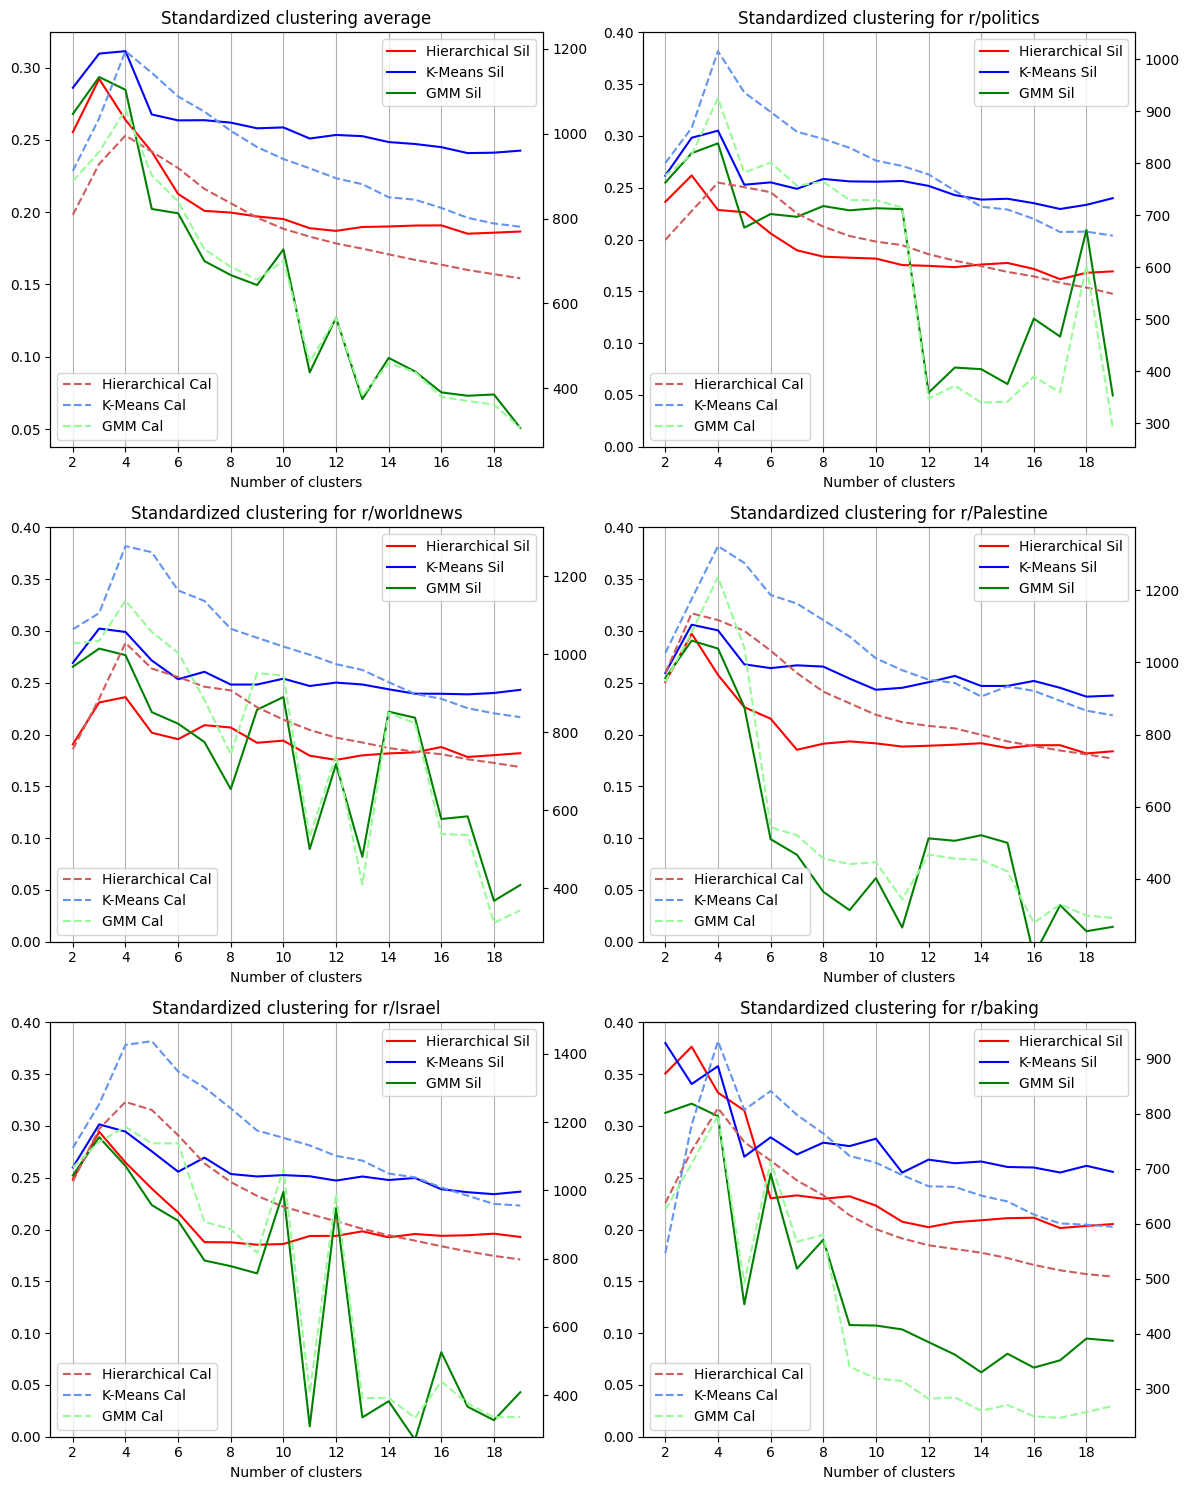

In [ ]:
# Calculate the number of rows and columns for standardized data
n_cols = 2
n_rows = (len(subreddits) + 1 + n_cols - 1) // n_cols  # +1 for the average plot

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 5))
x_list = n_clusters_range

# Plot standardized data
for i, sub in enumerate(subreddits):
    row = (i + 1) // n_cols
    col = (i + 1) % n_cols
    axes[row, col].set_title(f'Standardized clustering for r/{sub}', fontsize=12)
    axes[row, col].plot(x_list, hierarchical_sil_s[sub], label='Hierarchical Sil', color='red') 
    axes[row, col].plot(x_list, kmeans_sil_s[sub], label='K-Means Sil', color='blue') 
    axes[row, col].plot(x_list, gmm_sil_s[sub], label='GMM Sil', color='green') 
    cal_ax = axes[row, col].twinx()
    cal_ax.plot(x_list, hierarchical_cal_s[sub], label='Hierarchical Cal', color='indianred', linestyle='--') 
    cal_ax.plot(x_list, kmeans_cal_s[sub], label='K-Means Cal', color='cornflowerblue', linestyle='--') 
    cal_ax.plot(x_list, gmm_cal_s[sub], label='GMM Cal', color='palegreen', linestyle='--') 
    cal_ax.legend(loc='lower left')
    axes[row, col].legend(loc='upper right')
    axes[row, col].set_xlabel('Number of clusters')
    axes[row, col].set_xticks(x_list[::2])
    axes[row, col].set_ylim(0, 0.4)
    axes[row, col].grid(True, axis='x')

# Plot standardized averages
axes[0, 0].set_title(f'Standardized clustering average', fontsize=12)
axes[0, 0].plot(x_list, hierarchical_sil_s_avg, label='Hierarchical Sil', color='red')
axes[0, 0].plot(x_list, kmeans_sil_s_avg, label='K-Means Sil', color='blue')
axes[0, 0].plot(x_list, gmm_sil_s_avg, label='GMM Sil', color='green')
cal_ax = axes[0, 0].twinx()
cal_ax.plot(x_list, hierarchical_cal_s_avg, label='Hierarchical Cal', color='indianred', linestyle='--')
cal_ax.plot(x_list, kmeans_cal_s_avg, label='K-Means Cal', color='cornflowerblue', linestyle='--')
cal_ax.plot(x_list, gmm_cal_s_avg, label='GMM Cal', color='palegreen', linestyle='--')
cal_ax.legend(loc='lower left')
axes[0, 0].legend(loc='upper right')
axes[0, 0].set_xlabel('Number of clusters')
axes[0, 0].set_xticks(x_list[::2])
axes[0, 0].grid(True, axis='x')

plt.tight_layout()
plt.show()

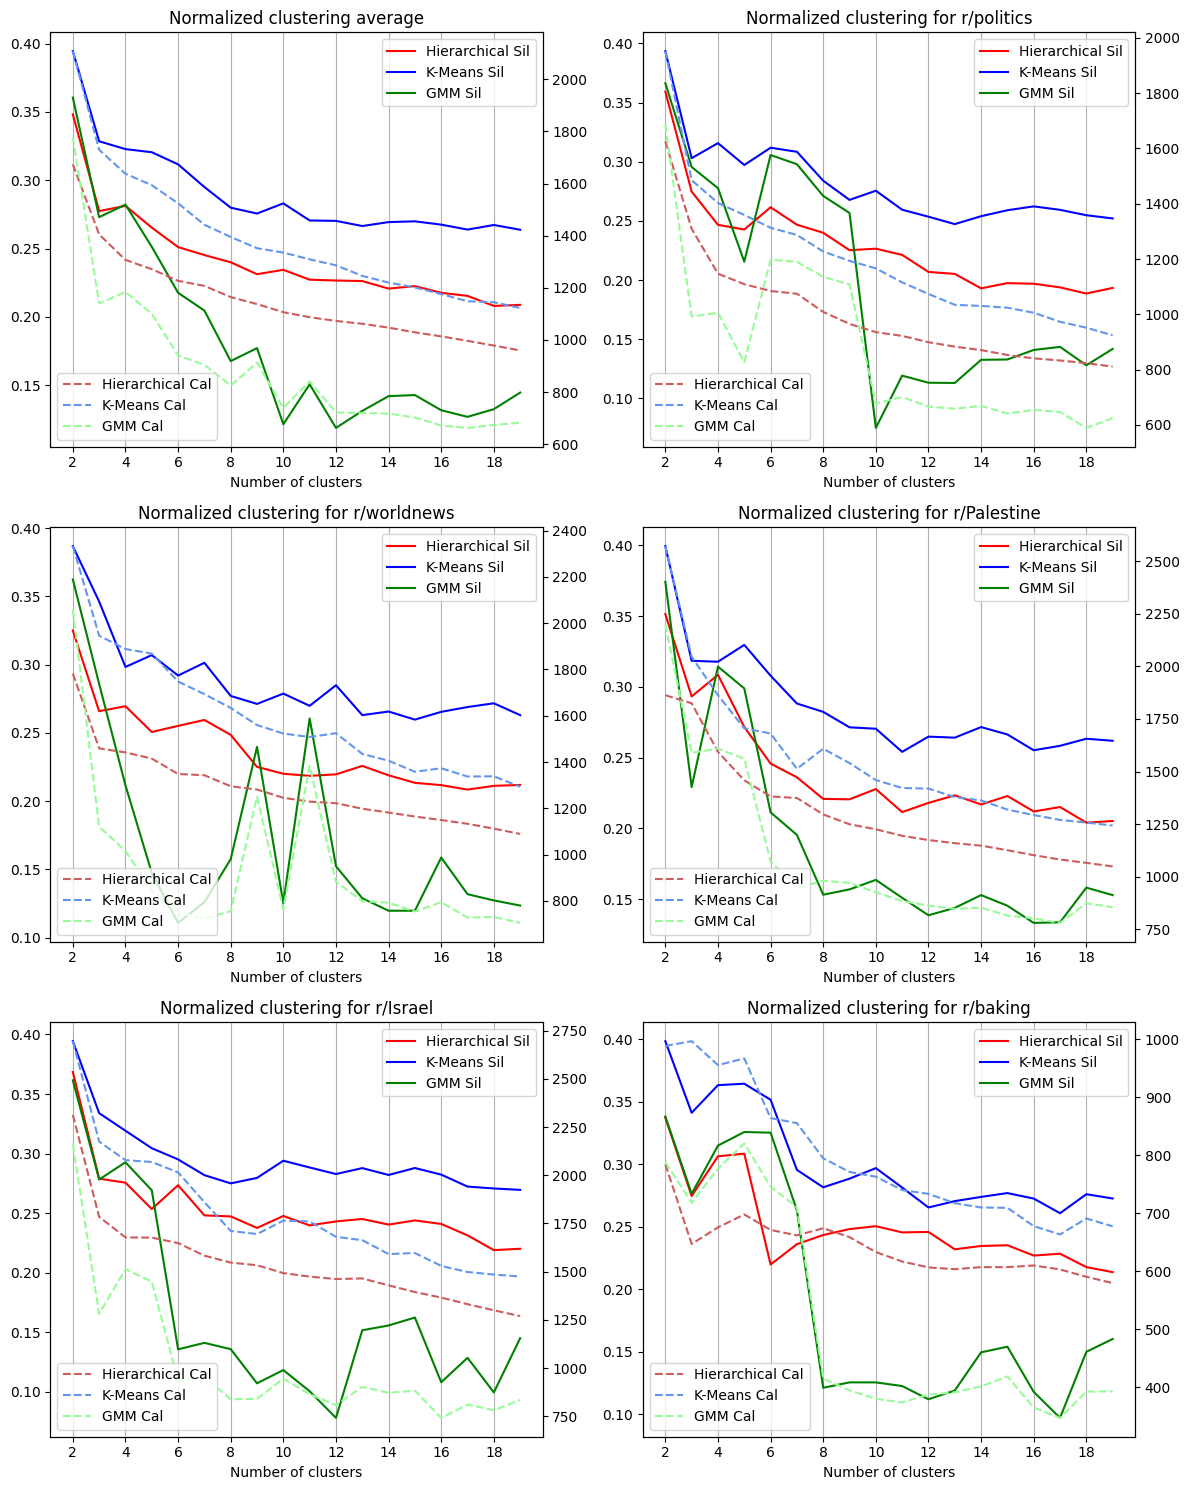

In [ ]:
# Calculate the number of rows and columns for normalized data
n_cols = 2
n_rows = (len(subreddits) + 1 + n_cols - 1) // n_cols  # +1 for the average plot

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 5))
x_list = n_clusters_range

# Plot normalized data
for i, sub in enumerate(subreddits):
    row = (i + 1) // n_cols
    col = (i + 1) % n_cols
    axes[row, col].set_title(f'Normalized clustering for r/{sub}', fontsize=12)
    axes[row, col].plot(x_list, hierarchical_sil_n[sub], label='Hierarchical Sil', color='red') 
    axes[row, col].plot(x_list, kmeans_sil_n[sub], label='K-Means Sil', color='blue') 
    axes[row, col].plot(x_list, gmm_sil_n[sub], label='GMM Sil', color='green') 
    cal_ax = axes[row, col].twinx()
    cal_ax.plot(x_list, hierarchical_cal_n[sub], label='Hierarchical Cal', color='indianred', linestyle='--') 
    cal_ax.plot(x_list, kmeans_cal_n[sub], label='K-Means Cal', color='cornflowerblue', linestyle='--') 
    cal_ax.plot(x_list, gmm_cal_n[sub], label='GMM Cal', color='palegreen', linestyle='--') 
    cal_ax.legend(loc='lower left')
    axes[row, col].legend(loc='upper right')
    axes[row, col].set_xlabel('Number of clusters')
    axes[row, col].set_xticks(x_list[::2])
    axes[row, col].grid(True, axis='x')

# Plot normalized averages
axes[0, 0].set_title(f'Normalized clustering average', fontsize=12)
axes[0, 0].plot(x_list, hierarchical_sil_n_avg, label='Hierarchical Sil', color='red')
axes[0, 0].plot(x_list, kmeans_sil_n_avg, label='K-Means Sil', color='blue')
axes[0, 0].plot(x_list, gmm_sil_n_avg, label='GMM Sil', color='green')
cal_ax = axes[0, 0].twinx()
cal_ax.plot(x_list, hierarchical_cal_n_avg, label='Hierarchical Cal', color='indianred', linestyle='--')
cal_ax.plot(x_list, kmeans_cal_n_avg, label='K-Means Cal', color='cornflowerblue', linestyle='--')
cal_ax.plot(x_list, gmm_cal_n_avg, label='GMM Cal', color='palegreen', linestyle='--')
cal_ax.legend(loc='lower left')
axes[0, 0].legend(loc='upper right')
axes[0, 0].set_xlabel('Number of clusters')
axes[0, 0].set_xticks(x_list[::2])
axes[0, 0].grid(True, axis='x')

plt.tight_layout()
plt.show()

This has been tested for multiple seeds for kmeans and GMM. The different plots can be found by changed seed in the code which generates the results.  

### Test DBSCAN

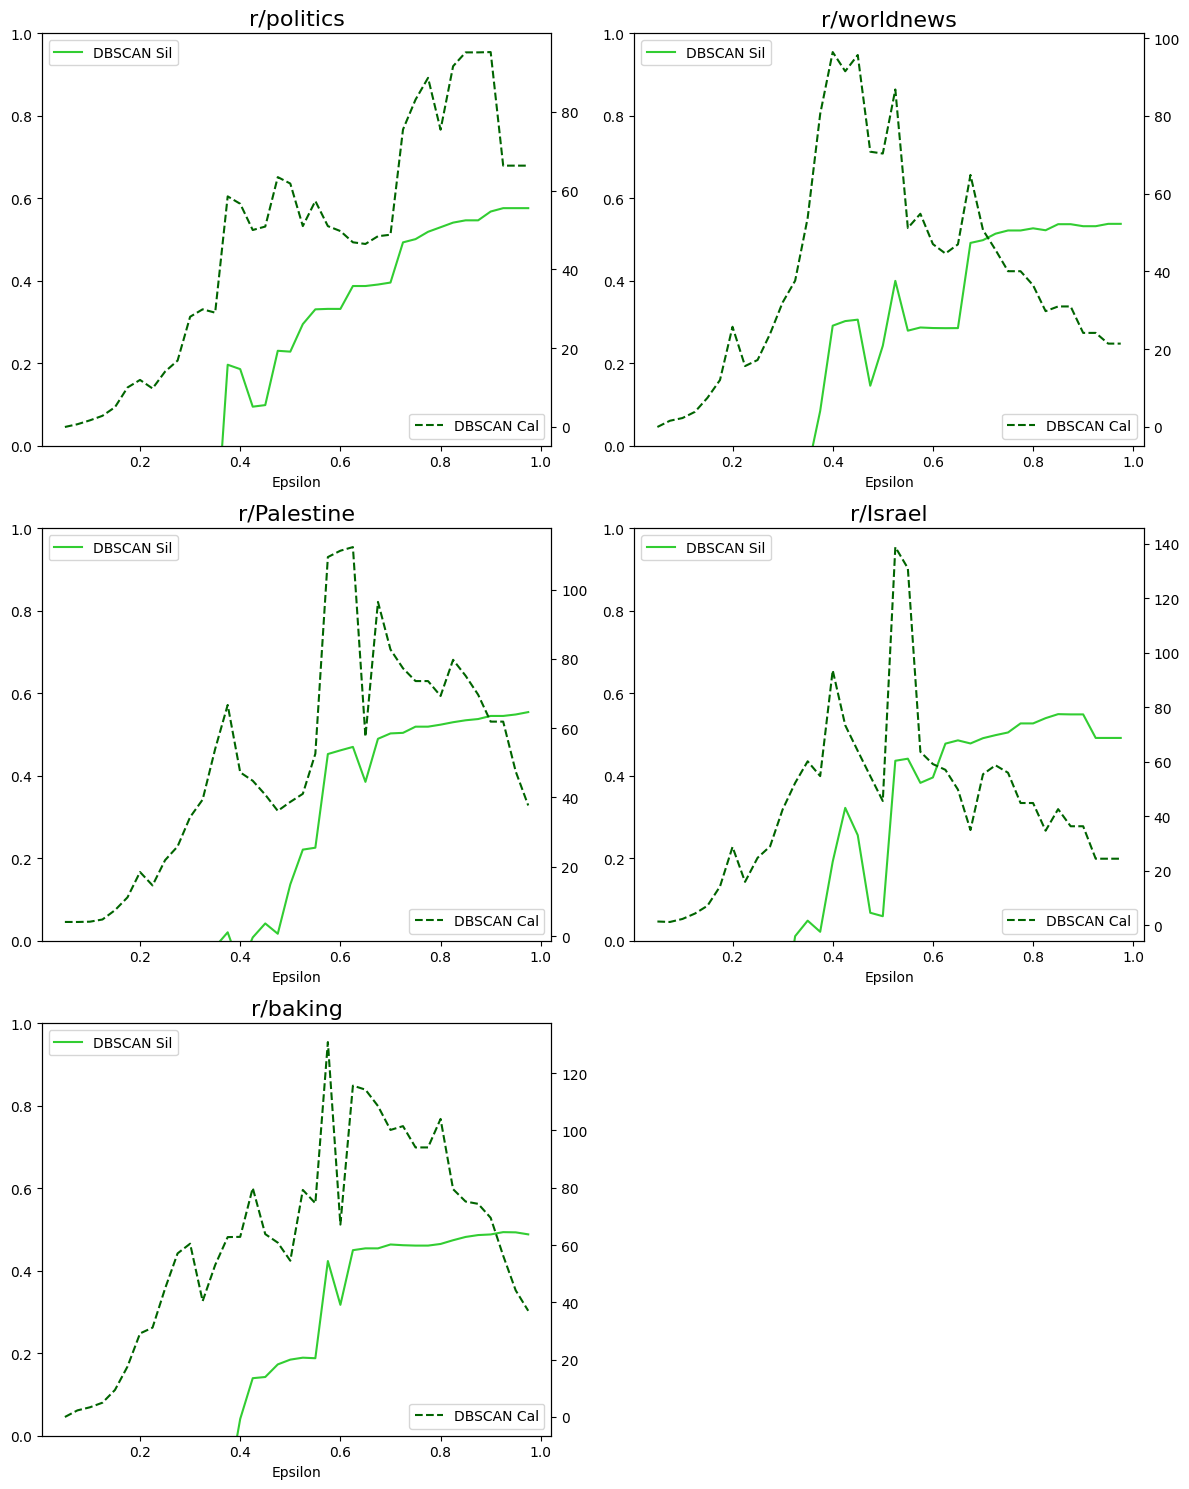

In [23]:
# Let's do the same with DBSCAN
DBSCAN_sil_n = {}
DBSCAN_cal_n = {}

epsilons = np.arange(0.05, 1, 0.025)

for sub, df in dfs.items():
    df = df[attribute_cols]
    DBSCAN_sil_n[sub] = []
    DBSCAN_cal_n[sub] = []
    points = StandardScaler().fit_transform(df)
    for ep in epsilons:
        dbscan = DBSCAN(eps=ep)  # eps is max distance between points for the same cluster
        dbscan.fit(points)
        
        # davies_bouldin_score not defined for single cluster
        if len(np.unique(dbscan.labels_)) == 1:
            DBSCAN_sil_n[sub].append(-1)
            DBSCAN_cal_n[sub].append(0)
        else:
            DBSCAN_sil_n[sub].append(silhouette_score(points, dbscan.labels_))
            DBSCAN_cal_n[sub].append(calinski_harabasz_score(points, dbscan.labels_))

# Calculate the number of rows and columns
n_cols = 2
n_subs = len(subreddits)
n_rows = (n_subs + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 5))
x_list = epsilons

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, sub in enumerate(subreddits):
    axes[i].set_title(f'r/{sub}', fontsize=16)
    axes[i].plot(x_list, DBSCAN_sil_n[sub], label='DBSCAN Sil', color='limegreen')
    cal_ax = axes[i].twinx()
    cal_ax.plot(x_list, DBSCAN_cal_n[sub], label='DBSCAN Cal', color='darkgreen', linestyle='--')
    cal_ax.legend(loc='lower right')
    axes[i].legend(loc='upper left')
    axes[i].set_xlabel('Epsilon')
    axes[i].set_ylim(0, 1)

# Hide any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Perform the clustering

In [ ]:
optimal_clusters = 5

optimal_epsilons = {
    'Israel' : 0.625,
    'Palestine' : 0.625,
    'politics' : 0.8,
    'worldnews' : 0.525,
    'baking': 0.575
}

for sub, df in dfs.items():
    df_cluster = df[attribute_cols].copy()
    
    # #Standardize the data
    df_cluster_scaled = StandardScaler().fit_transform(df_cluster)

    # #Apply clustering using tuned hyperparameters
    gmm_n_clusters = optimal_clusters
    n_clusters = optimal_clusters
    ep = optimal_epsilons[sub]

    GMM = GaussianMixture(n_components=gmm_n_clusters)
    GMM.fit(df_cluster_scaled)

    dbscan = DBSCAN(eps=ep) #eps is max distance between points for the same cluster
    dbscan.fit(df_cluster_scaled)

    kmeans = KMeans(n_clusters=n_clusters, random_state = 42)
    kmeans.fit(df_cluster_scaled)

    #Assign the cluster labels
    df['DBSCAN_cluster'] = dbscan.labels_
    df['GMM_cluster'] = GMM.predict(df_cluster_scaled)
    df['kmeans_cluster'] = kmeans.labels_


    # #### Export the new dataframes
    df.to_csv(f'data/{sub}_clustered.csv')
